In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [8]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [9]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [11]:
df.select_dtypes('object').columns

Index([], dtype='object')

In [12]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [13]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

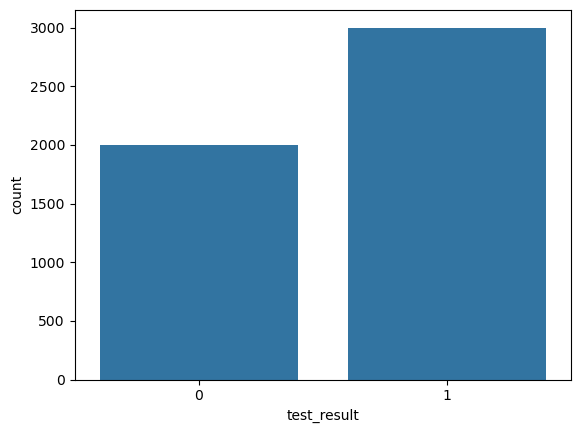

In [15]:
sns.countplot(data = df, x = 'test_result');

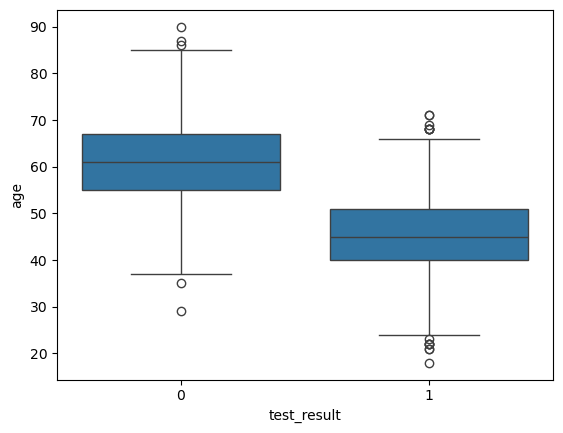

In [17]:
sns.boxplot(data=df, x = 'test_result', y = 'age');

<Axes: xlabel='test_result', ylabel='physical_score'>

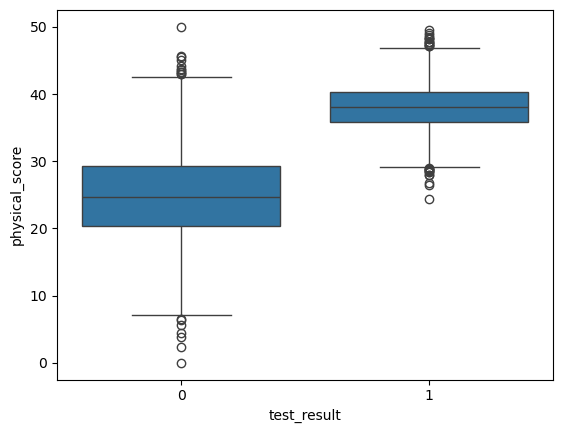

In [18]:
sns.boxplot(data = df, x = 'test_result', y = 'physical_score')

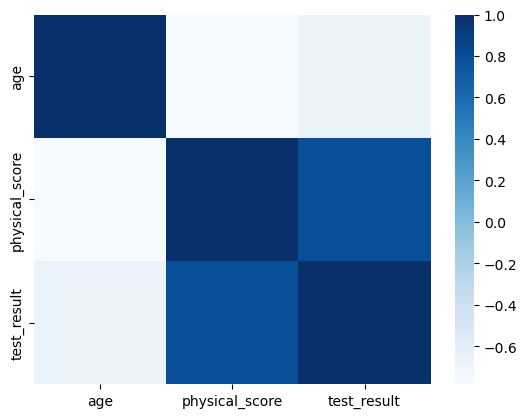

In [32]:
sns.heatmap(data=df.corr(), cmap='Blues');

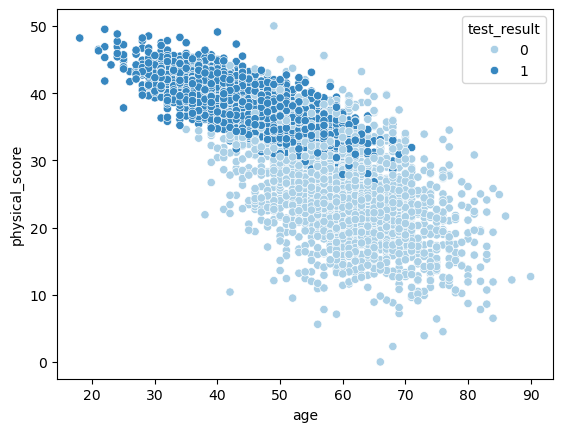

In [37]:
sns.scatterplot(data = df, x = 'age', y = 'physical_score', hue = 'test_result', palette='Blues');

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('test_result', axis = 1)
y = df['test_result']
scalar = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3500, 2) (3500,) (1500, 2) (1500,)


In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
preds_prob = model.predict_proba(X_test)[:, 1]
preds = model.predict(X_test)
print(preds)
print(preds_prob)
print(preds.shape)

[1 1 0 ... 0 1 1]
[9.75774073e-01 9.73082586e-01 1.13390220e-02 ... 8.11462744e-04
 8.80150715e-01 9.08339931e-01]
(1500,)


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
model.coef_

array([[-0.91707661,  3.45211325]])

In [51]:
accuracy_score(y_test, preds)

0.9206666666666666

<Axes: >

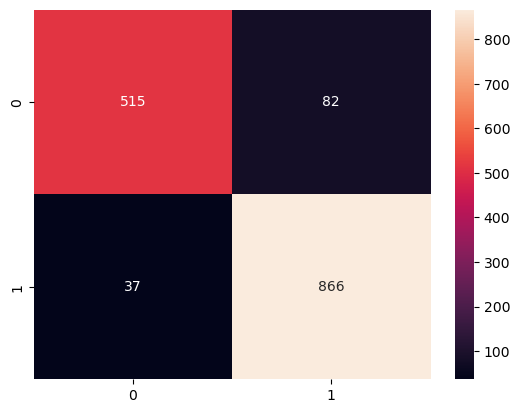

In [72]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d')

In [56]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       597
           1       0.91      0.96      0.94       903

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.92      0.92      0.92      1500



In [58]:
# Plot confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, preds)
recal = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
print(precision, recal, f1)

0.9135021097046413 0.9590254706533776 0.9357104267963263


In [59]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test, preds)
print(roc_auc_score)

0.9108360184087659


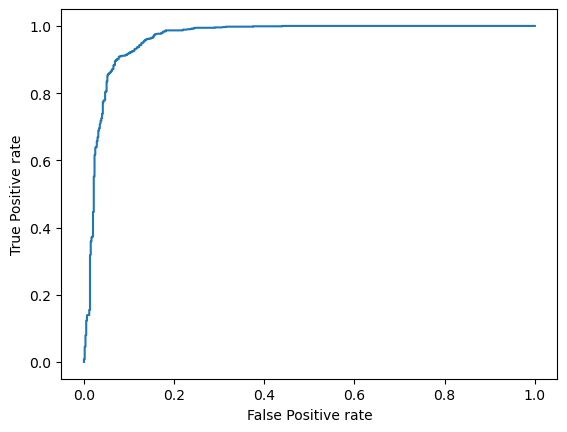

In [73]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, preds_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate');

In [74]:
print(auc(fpr, tpr))

0.9640533787431064


In [75]:
y_test[0]

1

In [77]:
model.predict(X_test)[0]

1

In [78]:

model.predict_proba(X_test)[0]

array([0.02422593, 0.97577407])